In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [52]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd 
from keras.layers import Dense, Activation,Layer,Lambda
import matplotlib.pyplot as plt


In [24]:
dataset=pd.read_csv("forestfires (1).csv",delimiter=",")

In [25]:
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [26]:
dataset.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
dataset.shape

(517, 31)

In [28]:
dataset.drop(["month","day"],axis=1,inplace = True)



In [29]:
dataset.shape

(517, 29)

In [30]:
dataset["size_category"].value_counts()
dataset.isnull().sum()
dataset.describe()
dataset = np.asarray(X).astype(np.float32)

In [31]:
def norm_func(i):
     x = (i-i.min())	/	(i.max()	-	i.min())
     return (x)

In [106]:



X = dataset[:,0:12]
Y = dataset[:,12]


In [107]:
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3,  activation='sigmoid'))

In [108]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [109]:
history=model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=5)

Epoch 1/500
70/70 [==============================] - 1s 4ms/step - loss: 0.4870 - accuracy: 0.7977 - val_loss: 0.4162 - val_accuracy: 0.7953
Epoch 2/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8064 - val_loss: 0.3987 - val_accuracy: 0.7953
Epoch 3/500
70/70 [==============================] - 0s 3ms/step - loss: 0.3955 - accuracy: 0.8064 - val_loss: 0.3949 - val_accuracy: 0.7953
Epoch 4/500
70/70 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8064 - val_loss: 0.3862 - val_accuracy: 0.7953
Epoch 5/500
70/70 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8064 - val_loss: 0.3744 - val_accuracy: 0.7953
Epoch 6/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.7948 - val_loss: 0.3662 - val_accuracy: 0.7193
Epoch 7/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.7861 - val_loss: 0.3660 - val_accuracy: 0.7193
Epoch 8/500
7

Epoch 59/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.7746 - val_loss: 0.3635 - val_accuracy: 0.7018
Epoch 60/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.7746 - val_loss: 0.3637 - val_accuracy: 0.7135
Epoch 61/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.7746 - val_loss: 0.3636 - val_accuracy: 0.7018
Epoch 62/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.7803 - val_loss: 0.3642 - val_accuracy: 0.7018
Epoch 63/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.7746 - val_loss: 0.3640 - val_accuracy: 0.7076
Epoch 64/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.7775 - val_loss: 0.3635 - val_accuracy: 0.7193
Epoch 65/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.7890 - val_loss: 0.3639 - val_accuracy: 0.7251
Epoch 

70/70 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.7890 - val_loss: 0.3640 - val_accuracy: 0.7368
Epoch 117/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.7890 - val_loss: 0.3646 - val_accuracy: 0.7193
Epoch 118/500
70/70 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.7775 - val_loss: 0.3641 - val_accuracy: 0.7368
Epoch 119/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.7861 - val_loss: 0.3650 - val_accuracy: 0.7427
Epoch 120/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.7861 - val_loss: 0.3642 - val_accuracy: 0.7719
Epoch 121/500
70/70 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.7919 - val_loss: 0.3649 - val_accuracy: 0.7251
Epoch 122/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.7803 - val_loss: 0.3651 - val_accuracy: 0.7135
Epoch 123/500

70/70 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.7601 - val_loss: 0.3623 - val_accuracy: 0.7135
Epoch 174/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.7630 - val_loss: 0.3625 - val_accuracy: 0.7135
Epoch 175/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.7659 - val_loss: 0.3625 - val_accuracy: 0.7135
Epoch 176/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.7601 - val_loss: 0.3626 - val_accuracy: 0.7135
Epoch 177/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.7601 - val_loss: 0.3626 - val_accuracy: 0.7135
Epoch 178/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.7543 - val_loss: 0.3626 - val_accuracy: 0.7135
Epoch 179/500
70/70 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.7659 - val_loss: 0.3624 - val_accuracy: 0.7135
Epoch 180/500

70/70 [==============================] - 0s 3ms/step - loss: 0.1859 - accuracy: 0.6879 - val_loss: 0.1832 - val_accuracy: 0.7135
Epoch 231/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.6879 - val_loss: 0.1832 - val_accuracy: 0.7135
Epoch 232/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.6850 - val_loss: 0.1832 - val_accuracy: 0.7135
Epoch 233/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.6850 - val_loss: 0.1831 - val_accuracy: 0.7135
Epoch 234/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.6850 - val_loss: 0.1831 - val_accuracy: 0.7135
Epoch 235/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.6821 - val_loss: 0.1831 - val_accuracy: 0.7076
Epoch 236/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.6821 - val_loss: 0.1830 - val_accuracy: 0.7076
Epoch 237/500

70/70 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.6734 - val_loss: 0.1735 - val_accuracy: 0.7135
Epoch 288/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.6734 - val_loss: 0.1724 - val_accuracy: 0.7076
Epoch 289/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.6734 - val_loss: 0.1727 - val_accuracy: 0.7135
Epoch 290/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1750 - accuracy: 0.6734 - val_loss: 0.1742 - val_accuracy: 0.7135
Epoch 291/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.6734 - val_loss: 0.1740 - val_accuracy: 0.7135
Epoch 292/500
70/70 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.6734 - val_loss: 0.1737 - val_accuracy: 0.7135
Epoch 293/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.6734 - val_loss: 0.1750 - val_accuracy: 0.7076
Epoch 294/500

70/70 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.2775 - val_loss: 0.1561 - val_accuracy: 0.4503
Epoch 345/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.2110 - val_loss: 0.1561 - val_accuracy: 0.4386
Epoch 346/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.1850 - val_loss: 0.1574 - val_accuracy: 0.4386
Epoch 347/500
70/70 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 0.2023 - val_loss: 0.1565 - val_accuracy: 0.4386
Epoch 348/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.2283 - val_loss: 0.1568 - val_accuracy: 0.4444
Epoch 349/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.2254 - val_loss: 0.1584 - val_accuracy: 0.4503
Epoch 350/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.1965 - val_loss: 0.1589 - val_accuracy: 0.4912
Epoch 351/500

70/70 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.1474 - val_loss: 0.1489 - val_accuracy: 0.3684
Epoch 402/500
70/70 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.1387 - val_loss: 0.1522 - val_accuracy: 0.4503
Epoch 403/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.1329 - val_loss: 0.1511 - val_accuracy: 0.4152
Epoch 404/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.1387 - val_loss: 0.1557 - val_accuracy: 0.4854
Epoch 405/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.1763 - val_loss: 0.1539 - val_accuracy: 0.4737
Epoch 406/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.1561 - val_loss: 0.1551 - val_accuracy: 0.4211
Epoch 407/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.1243 - val_loss: 0.1516 - val_accuracy: 0.3684
Epoch 408/500

70/70 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.2630 - val_loss: 0.1461 - val_accuracy: 0.4211
Epoch 459/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.2254 - val_loss: 0.1532 - val_accuracy: 0.5556
Epoch 460/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.3844 - val_loss: 0.1466 - val_accuracy: 0.4094
Epoch 461/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.3150 - val_loss: 0.1465 - val_accuracy: 0.6667
Epoch 462/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.3382 - val_loss: 0.1468 - val_accuracy: 0.6959
Epoch 463/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1217 - accuracy: 0.4711 - val_loss: 0.1485 - val_accuracy: 0.5731
Epoch 464/500
70/70 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.2775 - val_loss: 0.1550 - val_accuracy: 0.6374
Epoch 465/500

In [110]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.5764
accuracy: 57.64%


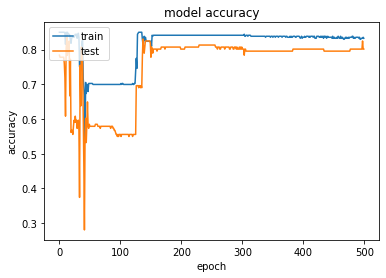

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

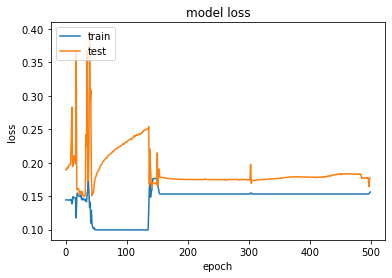

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Gas Turbine Dataset

In [67]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

In [58]:
data = pd.read_csv("gas_turbines.csv")

In [59]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [60]:
data.shape

(15039, 11)

In [61]:
Target = data['TEY']
data.drop(labels=['TEY'], axis=1,inplace = True)
data.insert(0, 'Y', Target)

data = data.rename({'Y':'TEY'}, axis = 1)

data.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
 4   AFDP    15039 non-null  float64
 5   GTEP    15039 non-null  float64
 6   TIT     15039 non-null  float64
 7   TAT     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [63]:
data.describe()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
count,15039.000000,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,12.102353,1.972499,68.190934
std,15.829717,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,1.103196,2.222206,10.470586
min,100.170000,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,9.904400,0.000388,27.765000
25%,127.985000,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,11.622000,0.858055,61.303500
50%,133.780000,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,12.025000,1.390200,66.601000
75%,140.895000,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,12.578000,2.160400,73.935500
max,174.610000,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,15.081000,44.103000,119.890000


In [64]:
data.isna().sum()

TEY     0
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
dtype: int64

In [65]:
data.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


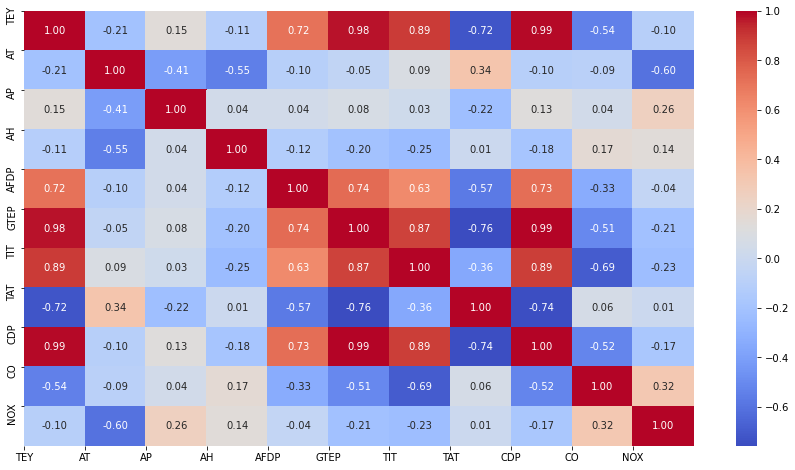

In [68]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [70]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [71]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [75]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.402671
Feature 1: 0.146784
Feature 2: 0.091024
Feature 3: 0.656863
Feature 4: 1.590640
Feature 5: 1.305677
Feature 6: 0.914488
Feature 7: 1.711547
Feature 8: 0.506866
Feature 9: 0.303484


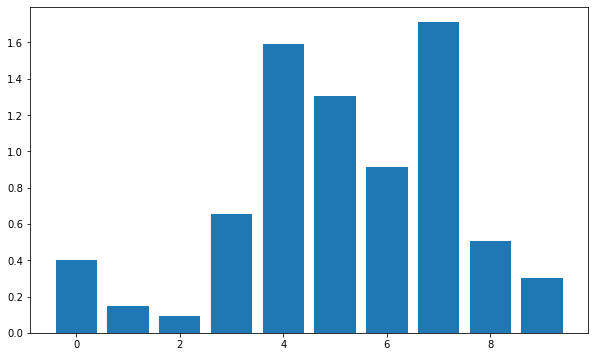

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [77]:
X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)

In [78]:
y = data.iloc[:,0]

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [80]:
scaler.fit(X)

StandardScaler()

In [81]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [82]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985
...,...,...,...,...,...
15034,-0.865850,-1.498657,-2.063184,0.103453,-1.543161
15035,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247
15036,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922
15037,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598


In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [84]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


In [85]:
from keras.models import Sequential
from keras.layers import Dense

In [86]:
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [87]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [89]:
history=model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9933 - mse: 0.9933
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9934 - mse: 0.9934
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9935 - mse: 0.9935
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9937 - mse: 0.9937
Epoch 5/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9936 - mse: 0.9936
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9936 - mse: 0.9936
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9940 - mse: 0.9940
Epoch 8/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9930 - mse: 0.9930
Epoch 9/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9938 - mse: 0.9938
Epoch 10/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9934 - mse: 0.9934
Epoch 11/100
264/264 [=================

264/264 [==============================] - 0s 1ms/step - loss: 0.9933 - mse: 0.9933
Epoch 86/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9935 - mse: 0.9935
Epoch 87/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9932 - mse: 0.9932
Epoch 88/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9936 - mse: 0.9936
Epoch 89/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9932 - mse: 0.9932
Epoch 90/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9936 - mse: 0.9936
Epoch 91/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9936 - mse: 0.9936
Epoch 92/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9934 - mse: 0.9934
Epoch 93/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9932 - mse: 0.9932
Epoch 94/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9939 - mse: 0.9939
Epoch 95/100
264/264 [=====================

In [90]:
scores = model.evaluate(x_test, y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 1s 1ms/step - loss: 1.0169 - mse: 1.0169
mse
